**Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [38]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [39]:
IMAGE_SHAPE = (224, 224)

In [40]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

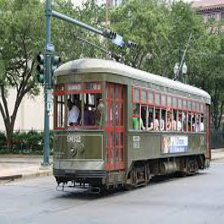

In [45]:
streetcar = Image.open("streetcar.jpeg").resize(IMAGE_SHAPE)
streetcar

In [46]:
streetcar=np.array(streetcar)/255

In [47]:
streetcar.shape

(224, 224, 3)

In [48]:
streetcar[np.newaxis, ...].shape

(1, 224, 224, 3)

In [51]:
result = classifier.predict(streetcar[np.newaxis, ...])
result.shape

(1, 1001)

In [52]:
pred_label_idx = np.argmax(result)
pred_label_idx

830

**Image labels-** tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [53]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [54]:
image_labels[pred_label_idx]

'streetcar'

**Load flowers dataset**

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [10]:
data_dir

'./datasets/flower_photos'

**data_dir. is string, need to convert into path type**

In [11]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [12]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/2542908888_25a1c78ff0.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7132677385_bcbdcc6001.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5628296138_9031791fab.jpg'),
 PosixPath('datasets/flower_photos/dandelion/6103898045_e066cdeedf_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19586799286_beb9d684b5.jpg')]

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [14]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6653567281_768a1fd160.jpg'),
 PosixPath('datasets/flower_photos/roses/1793211631_68c31a74dc.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6676529655_9672b6f955_m.jpg')]

In [15]:
import PIL

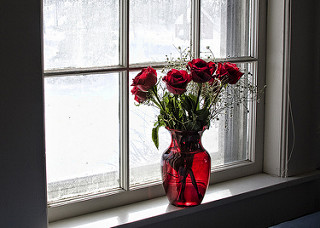

In [16]:
PIL.Image.open(str(roses[100]))

#### Read flowers images from disk into numpy array using opencv

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/6653567281_768a1fd160.jpg'),
 PosixPath('datasets/flower_photos/roses/1793211631_68c31a74dc.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6676529655_9672b6f955_m.jpg')]

In [20]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/6653567281_768a1fd160.jpg'

In [21]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [22]:
img

array([[[192, 205, 213],
        [193, 206, 214],
        [193, 207, 213],
        ...,
        [212, 231, 236],
        [213, 232, 237],
        [213, 232, 237]],

       [[194, 207, 215],
        [194, 207, 215],
        [194, 208, 214],
        ...,
        [212, 231, 236],
        [213, 232, 237],
        [213, 232, 237]],

       [[193, 206, 214],
        [194, 207, 215],
        [195, 209, 215],
        ...,
        [213, 232, 237],
        [213, 232, 237],
        [213, 232, 237]],

       ...,

       [[185, 199, 211],
        [184, 198, 210],
        [184, 199, 208],
        ...,
        [215, 231, 237],
        [215, 231, 237],
        [215, 231, 237]],

       [[184, 198, 210],
        [183, 197, 209],
        [183, 197, 209],
        ...,
        [215, 231, 237],
        [215, 231, 237],
        [215, 231, 237]],

       [[183, 197, 209],
        [183, 197, 209],
        [183, 197, 209],
        ...,
        [215, 231, 237],
        [215, 231, 237],
        [215, 231, 237]]

In [23]:
img.shape

(334, 500, 3)

#### Resizing all images

In [24]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [28]:
X[0].shape

(224, 224, 3)

In [29]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [30]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

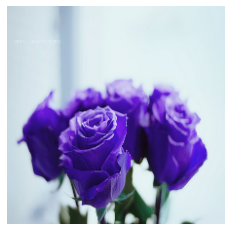

In [31]:
plt.axis('off')
plt.imshow(X[0])

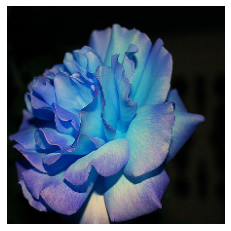

In [32]:
plt.axis('off')
plt.imshow(X[1])

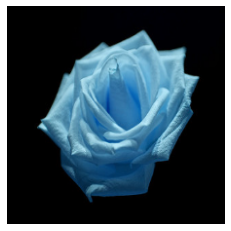

In [33]:
plt.axis('off')
plt.imshow(X[2])

In [34]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([722, 795, 592])

In [55]:
for label in predicted:
    print(image_labels[label])

pillow
shower curtain
handkerchief


**As of now this model is not usable.Now take pre-trained model and retrain it using flowers images**

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers, activation='softmax')
])

model.summary()

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 98s 1s/step - loss: 1.1062 - acc: 0.5617
Epoch 2/5
86/86 [==============================] - 94s 1s/step - loss: 0.4267 - acc: 0.8605
Epoch 3/5
86/86 [==============================] - 93s 1s/step - loss: 0.3183 - acc: 0.8924
Epoch 4/5
86/86 [==============================] - 94s 1s/step - loss: 0.2573 - acc: 0.9207
Epoch 5/5
86/86 [==============================] - 93s 1s/step - loss: 0.2247 - acc: 0.9331


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 32s 1s/step - loss: 0.3923 - acc: 0.8638


[0.39231473207473755, 0.8638344407081604]

**If we try to build CNN**

In [36]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 119s 1s/step - loss: 1.5260 - accuracy: 0.3451
Epoch 2/10
86/86 [==============================] - 118s 1s/step - loss: 0.9986 - accuracy: 0.6041
Epoch 3/10
86/86 [==============================] - 121s 1s/step - loss: 0.7370 - accuracy: 0.7232
Epoch 4/10
86/86 [==============================] - 118s 1s/step - loss: 0.5055 - accuracy: 0.8201
Epoch 5/10
86/86 [==============================] - 118s 1s/step - loss: 0.3231 - accuracy: 0.8893
Epoch 6/10
86/86 [==============================] - 118s 1s/step - loss: 0.1613 - accuracy: 0.9533
Epoch 7/10
86/86 [==============================] - 118s 1s/step - loss: 0.0883 - accuracy: 0.9769
Epoch 8/10
86/86 [==============================] - 123s 1s/step - loss: 0.0598 - accuracy: 0.9836
Epoch 9/10
86/86 [==============================] - 117s 1s/step - loss: 0.0438 - accuracy: 0.9899
Epoch 10/10
86/86 [==============================] - 117s 1s/step - loss: 0.0215 - accuracy: 0.9950


In [37]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 12s 404ms/step - loss: 3.0902 - accuracy: 0.6024


[3.090209722518921, 0.6023964881896973]

**Our CNN model clearly took lot more time to train and the accuracy is also pretty low compared to pretrained model (without top layer) mobilenet_v2**